In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.drop_duplicates()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [8]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
df.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [11]:
df=df.sort_values(by="Date")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25
...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df["Date"]=pd.to_datetime(df["Date"])

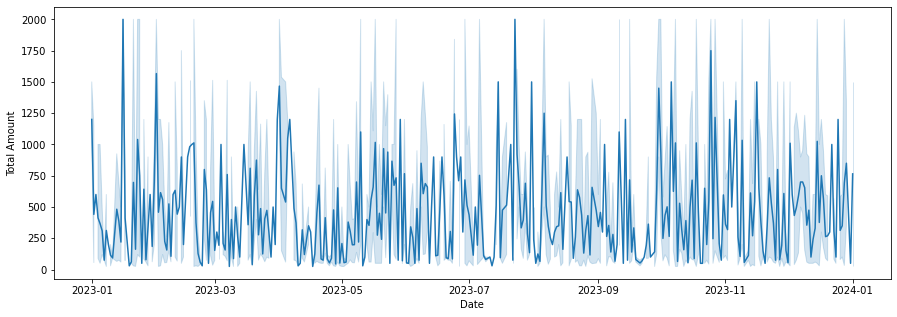

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Date" , y = "Total Amount" , data=df)
plt.show()

In [16]:
df["Month"] = df["Date"].dt.month
df["Year"]=df["Date"].dt.year

In [17]:
Monthly_sales = df.groupby(["Year", "Month"], as_index=False)["Total Amount"].sum()
df["Monthly_sales"]=Monthly_sales["Total Amount"]

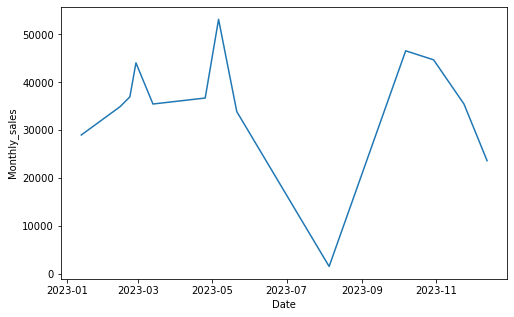

In [19]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Date"  ,y = "Monthly_sales" , data = df)
plt.show()

In [23]:
df=df.drop(['Month' , 'Year' , 'Monthly_sales'], axis=1)
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [24]:
age_bins=[10,20,30,40,50,60]
age_labels = ['10-19' , '20-29' , '30-39' , '40-49' , '50+']
df["Age Group"]=pd.cut(df["Age"],bins=age_bins,labels=age_labels,right=True)

In [25]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,40-49
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,40-49
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,30-39
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,10-19
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,10-19
...,...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,50+
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500,20-29
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,50+
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,40-49


In [26]:
Total_amount_by_age = df.groupby('Age Group')['Total Amount'].sum()
print(Total_amount_by_age)

Age Group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


In [28]:
Grouped_data=df.groupby(['Age Group','Product Category'])['Total Amount'].sum().reset_index()

In [29]:
Grouped_data

,Age Group,Product Category,Total Amount
0,10-19,Beauty,11850
1,10-19,Clothing,7255
2,10-19,Electronics,15625
3,20-29,Beauty,33860
4,20-29,Clothing,41415
5,20-29,Electronics,22940
6,30-39,Beauty,32825
7,30-39,Clothing,31250
8,30-39,Electronics,31875
9,40-49,Beauty,33095


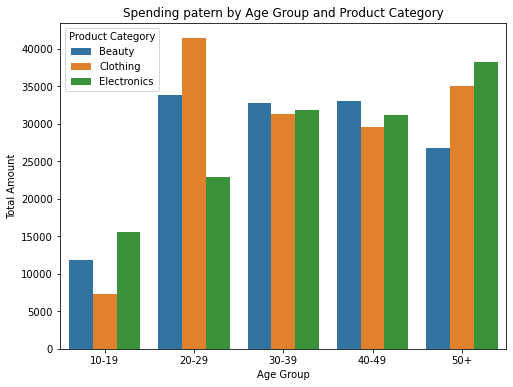

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x="Age Group" , y="Total Amount" , hue="Product Category" , data = Grouped_data)
plt.title("Spending patern by Age Group and Product Category")
plt.xlabel("Age Group")
plt.ylabel("Total Amount")
plt.show()

In [32]:
Gender_totalspend=df.groupby("Gender")["Total Amount"].sum().reset_index()
Gender_totalspend

,Gender,Total Amount
0,Female,232840
1,Male,223160


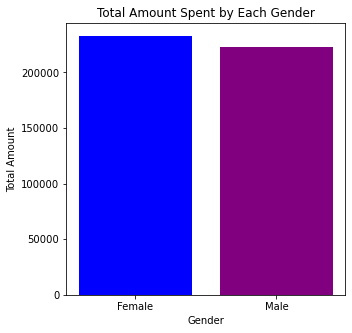

In [35]:
plt.figure(figsize=(5,5))
plt.bar(Gender_totalspend['Gender'],Gender_totalspend['Total Amount'],color=["blue","purple"])
plt.title("Total Amount Spent by Each Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()

In [36]:
Gender_preference = df.groupby(['Gender','Product Category'])['Total Amount'].sum().reset_index()
Gender_preference

,Gender,Product Category,Total Amount
0,Female,Beauty,74830
1,Female,Clothing,81275
2,Female,Electronics,76735
3,Male,Beauty,68685
4,Male,Clothing,74305
5,Male,Electronics,80170


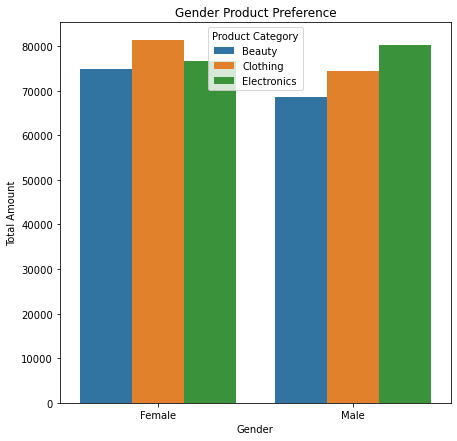

In [38]:
plt.figure(figsize=(7,7))
sns.barplot(x='Gender' , y='Total Amount' , hue="Product Category" , data=Gender_preference)
plt.title("Gender Product Preference")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()

In [39]:
Avg_Amount_by_Gender=df.groupby('Gender')['Total Amount'].mean()
Avg_Amount_by_Gender

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

In [40]:
Total_revenue = df.groupby('Product Category')['Total Amount'].sum().reset_index()
Total_revenue

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


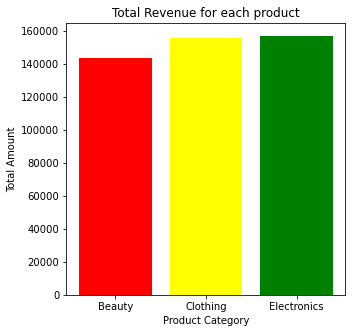

In [41]:
plt.figure(figsize=(5,5))
plt.bar(Total_revenue['Product Category'],Total_revenue['Total Amount'],color=['red','yellow','green'])
plt.title("Total Revenue for each product")
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

In [42]:
Total_num=df.groupby('Product Category')['Quantity'].sum().reset_index()
Total_num

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849
